In [ ]:
!pip install kagglehub pandas

In [ ]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("hubertsidorowicz/football-players-stats-2025-2026")
print("✅ Dataset downloaded to:", path)

files = os.listdir(path)
print("Files found in folder:", files)

csv_file = [f for f in files if f.endswith('.csv')][0]
df_raw = pd.read_csv(os.path.join(path, csv_file))

print(f"\n🚀 Success! Loaded {len(df_raw)} players from the Big 5 Leagues.")
df_raw.head()

100%|██████████| 978k/978k [00:00<00:00, 68.9MB/s]

Extracting files...
✅ Dataset downloaded to: /root/.cache/kagglehub/datasets/hubertsidorowicz/football-players-stats-2025-2026/versions/25
Files found in folder: ['players_data_light-2025_2026.csv', 'players_data-2025_2026.csv']

🚀 Success! Loaded 2433 players from the Big 5 Leagues.


,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,...,Att (GK),Thr,Launch%,AvgLen,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist
0,1,Brenden Aaronson,us USA,"FW,MF",Leeds United,eng Premier League,25.0,2000.0,20,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Zach Abbott,eng ENG,DF,Nott'ham Forest,eng Premier League,19.0,2006.0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Jones El-Abdellaoui,ma MAR,"FW,MF",Celta Vigo,es La Liga,20.0,2006.0,10,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Himad Abdelli,dz ALG,MF,Angers,fr Ligue 1,26.0,1999.0,13,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Ali Abdi,tn TUN,"DF,MF",Nice,fr Ligue 1,32.0,1993.0,9,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Print all column names to search for 'value' or 'wage'
print(df_raw.columns.tolist())

['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'G+A-PK', 'xG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Sh', 'SoT', 'SoT%', 'Sh/90', 'SoT/90', 'G/Sh', 'G/SoT', 'Dist', 'FK', 'PK_stats_shooting', 'PKatt_stats_shooting', 'xG_stats_shooting', 'npxG_stats_shooting', 'npxG/Sh', 'G-xG', 'np:G-xG', 'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Ast_stats_passing', 'xAG_stats_passing', 'xA', 'A-xAG', 'KP', '1/3', 'PPA', 'CrsPA', 'PrgP_stats_passing', 'Live', 'Dead', 'FK_stats_passing_types', 'TB', 'Sw', 'Crs', 'TI', 'CK', 'In', 'Out', 'Str', 'Cmp_stats_passing_types', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Att_stats_defense', 'Tkl%', 'Lost', 'Blocks_stats_defense', 'Sh_stats_defense', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err', 'SCA', 'SCA90', 'PassLive', 'PassDead', 'TO', 'Sh_stats_gca', 'Fld', 'Def', 'GCA', 'GCA90', 'Touches', 'Def Pen', 'Def 3rd_stats_possess

In [ ]:
# 1. Clean column names
df_stats.columns = df_stats.columns.str.strip()
df_salaries.columns = df_salaries.columns.str.strip()

# 2. Search for ANY column that might contain player names
potential_name_cols = [col for col in df_salaries.columns if 'Name' in col or 'Player' in col or 'player' in col]
print("🔍 Found these potential name columns in Salary data:", potential_name_cols)

# 3. If no name column is found, the file might be wrong.
if not potential_name_cols:
    print("❌ No 'Name' or 'Player' columns found. Full list of Salary columns:")
    print(df_salaries.columns.tolist())
else:
    # 4. Attempt merge with the first name column we found
    name_col = potential_name_cols[0]
    df_merged = pd.merge(df_stats, df_salaries, left_on='Player', right_on=name_col, how='left')
    print(f"✅ Merge successful using '{name_col}'!")

🔍 Found these potential name columns in Salary data: []
❌ No 'Name' or 'Player' columns found. Full list of Salary columns:
['Is_top_5_League', 'Based_rich_nation', 'Is_top_ranked_nation', 'EU_National', 'Caps', 'Apps', 'Age', 'Reputation', 'Is_top_prev_club', 'Last_Transfer_Fee', 'Salary']


In [ ]:
import os

# 1. Identify all files in the salary path again
salary_files = os.listdir(salary_path)
print("Files in Salary Folder:", salary_files)

# 2. Specifically look for 'raw_wages.csv'
if 'raw_wages.csv' in salary_files:
    df_salaries = pd.read_csv(os.path.join(salary_path, 'raw_wages.csv'))
    print("✅ Correct Salary file loaded!")
    print("New Columns:", df_salaries.columns.tolist()[:10]) # Verify 'Player' or 'Name' exists
else:
    # If it's named something else, let's just find the largest CSV (usually the raw one)
    csv_files = [f for f in salary_files if f.endswith('.csv')]
    print("Available CSVs:", csv_files)
    # Pick the one that ISN'T 'SalaryPrediction'
    correct_file = [f for f in csv_files if 'Prediction' not in f][0]
    df_salaries = pd.read_csv(os.path.join(salary_path, correct_file))
    print(f"✅ Loaded {correct_file} instead.")

Files in Salary Folder: ['wages_cleaned.csv', 'raw_wages.csv']
✅ Correct Salary file loaded!
New Columns: ['Name', 'Club', 'Division', 'Based', 'Nat', 'EU National', 'Caps', 'AT Apps', 'Position', 'Age']


In [ ]:
# 1. Clean names to ensure they match perfectly
df_stats['Player_match'] = df_stats['Player'].str.strip().str.lower()
df_salaries['Name_match'] = df_salaries['Name'].str.strip().str.lower()

# 2. Automatically find the Salary/Wage column
# We look for columns that contain numbers or have 'wage'/'salary' in the title
salary_col = [col for col in df_salaries.columns if 'wage' in col.lower() or 'salary' in col.lower() or 'value' in col.lower()]
print(f"💰 Found salary columns: {salary_col}")

# 3. Perform the merge
# We keep all stats (left join) and attach whatever salary data we found
df_merged = pd.merge(df_stats, df_salaries[['Name_match'] + salary_col],
                     left_on='Player_match', right_on='Name_match', how='left')

# 4. Filter for players who actually have salary data
df_final = df_merged[df_merged[salary_col[0]].notna()].copy()

print(f"✅ Success! You now have {len(df_final)} players with both Performance AND Salary data.")
df_final[['Player', 'Squad', 'xG', salary_col[0]]].head()

💰 Found salary columns: ['Salary']
✅ Success! You now have 0 players with both Performance AND Salary data.


,Player,Squad,xG,Salary


In [ ]:
# Create basic per-90 metrics
df_final['xG_per_90'] = (df_final['xG'] / df_final['Min']) * 90
df_final['PrgP_per_90'] = (df_final['PrgP'] / df_final['Min']) * 90 # Progressive Passes

# Create a "Market Value" proxy if needed, or clean the existing Wage column
# Note: Salaries often come as strings like "£10,000". Let's convert to numbers.
def clean_currency(value):
    if isinstance(value, str):
        return float(value.replace('£', '').replace(',', '').replace('$', '').split('(')[0].strip())
    return value

main_wage_col = salary_col[0]
df_final['Weekly_Wage_Numeric'] = df_final[main_wage_col].apply(clean_currency)

# 🚀 THE MONEYBALL METRIC: Performance per 1000 units of Wage
df_final['Value_Index'] = df_final['xG_per_90'] / (df_final['Weekly_Wage_Numeric'] / 1000)

print("📈 Value Index Created! Top 5 potential bargains:")
print(df_final.sort_values(by='Value_Index', ascending=False)[['Player', 'Squad', 'xG_per_90', 'Weekly_Wage_Numeric', 'Value_Index']].head())

📈 Value Index Created! Top 5 potential bargains:
Empty DataFrame
Columns: [Player, Squad, xG_per_90, Weekly_Wage_Numeric, Value_Index]
Index: []


In [ ]:
import unicodedata

# 1. Function to remove accents (e.g., 'é' -> 'e')
def normalize_name(name):
    if not isinstance(name, str):
        return name
    # Normalize unicode characters and remove non-spacing marks (accents)
    nfkd_form = unicodedata.normalize('NFKD', name)
    return "".join([c for c in nfkd_form if not unicodedata.combining(c)]).strip().lower()

# 2. Apply normalization to both datasets
df_stats['Player_clean'] = df_stats['Player'].apply(normalize_name)
df_salaries['Name_clean'] = df_salaries['Name'].apply(normalize_name)

# 3. Re-attempt the merge on the cleaned columns
# We look for the 'Salary' column you found earlier
df_merged = pd.merge(
    df_stats,
    df_salaries[['Name_clean', 'Salary']],
    left_on='Player_clean',
    right_on='Name_clean',
    how='inner' # 'inner' only keeps players found in BOTH
)

print(f"✅ Success! You now have {len(df_merged)} matching players.")
if len(df_merged) > 0:
    print(df_merged[['Player', 'Salary']].head())
else:
    print("❌ Still 0. Let's check a few names manually:")
    print("Stats names:", df_stats['Player_clean'].head(3).tolist())
    print("Salary names:", df_salaries['Name_clean'].head(3).tolist())

✅ Success! You now have 0 matching players.
❌ Still 0. Let's check a few names manually:
Stats names: ['brenden aaronson', 'zach abbott', 'jones el-abdellaoui']
Salary names: ['cristiano ronaldo - portuguese', 'karim benzema - french', 'neymar - brazilian']


In [ ]:
# 1. Clean the Salary names by removing everything after the " - "
# This transforms 'cristiano ronaldo - portuguese' into 'cristiano ronaldo'
df_salaries['Name_clean'] = df_salaries['Name'].str.split(' - ').str[0].apply(normalize_name)

# 2. Re-run the merge using these cleaned columns
df_merged = pd.merge(
    df_stats,
    df_salaries[['Name_clean', 'Salary']],
    left_on='Player_clean',
    right_on='Name_clean',
    how='inner'
)

print(f"✅ Success! You now have {len(df_merged)} matching players.")

# 3. Check the results
if len(df_merged) > 0:
    print("\nTop matched players and their salaries:")
    print(df_merged[['Player', 'Salary']].head(10))
else:
    print("❌ Still 0? Let's check a few cleaned salary names:")
    print(df_salaries['Name_clean'].head(5).tolist())

✅ Success! You now have 2 matching players.

Top matched players and their salaries:
          Player              Salary
0     Ezri Konsa   €74,157,000 p/a  
1  Kylian Mbappé   €48,467,000 p/a  


In [ ]:
import re

# 1. Advanced Cleaning Function: Removes non-alphabetic characters and nationality tags
def ultimate_clean(text):
    if not isinstance(text, str): return ""
    # Remove everything after hyphens or parentheses (common in salary data)
    text = re.split(r'[-—(]', text)[0]
    # Remove accents and non-letters (like dots or apostrophes)
    text = normalize_name(text) # Use the normalize_name function we created earlier
    text = re.sub(r'[^a-z ]', '', text)
    return text.strip()

# 2. Re-clean both DataFrames
df_stats['Player_final'] = df_stats['Player'].apply(ultimate_clean)
df_salaries['Name_final'] = df_salaries['Name'].apply(ultimate_clean)

# 3. The Merge
# We'll use a 'left' join to see all stats, but then filter for matches
df_merged = pd.merge(
    df_stats,
    df_salaries[['Name_final', 'Salary']],
    left_on='Player_final',
    right_on='Name_final',
    how='inner'
)

# 4. Remove exact duplicates (some players might appear twice if names were very similar)
df_merged = df_merged.drop_duplicates(subset=['Player'])

print(f"🔥 FINAL SUCCESS! You now have {len(df_merged)} matching players.")
print(df_merged[['Player', 'Salary']].head(10))

🔥 FINAL SUCCESS! You now have 2 matching players.
          Player              Salary
0     Ezri Konsa   €74,157,000 p/a  
1  Kylian Mbappé   €48,467,000 p/a  


In [ ]:
# 1. Convert Salary string ("€74,157,000 p/a") to a clean number
def salary_to_num(val):
    if not isinstance(val, str): return 0
    # Remove Euro symbol, commas, and "p/a"
    num_str = val.replace('€', '').replace(',', '').replace('p/a', '').strip()
    try:
        return float(num_str)
    except:
        return 0

df_merged['Annual_Salary'] = df_merged['Salary'].apply(salary_to_num)

# 2. Filter for players with a real salary (> 0) and meaningful minutes (> 450)
df_analysis = df_merged[(df_merged['Annual_Salary'] > 0) & (df_merged['Min'] > 450)].copy()

# 3. Create the Efficiency Score (xG per Million Euro)
# This tells us: How much scoring threat do we get for every €1M we spend?
df_analysis['xG_per_Million'] = (df_analysis['xG'] / (df_analysis['Annual_Salary'] / 1000000))

# 4. Show the top 10 "Bargain" Forwards
print("🏆 TOP 10 UNDERVALUED ATTACKERS (xG per €1M Salary):")
print(df_analysis.sort_values(by='xG_per_Million', ascending=False)[['Player', 'Squad', 'xG', 'Annual_Salary', 'xG_per_Million']].head(10))

🏆 TOP 10 UNDERVALUED ATTACKERS (xG per €1M Salary):
          Player        Squad    xG  Annual_Salary  xG_per_Million
1  Kylian Mbappé  Real Madrid  15.7     48467000.0        0.323932
0     Ezri Konsa  Aston Villa   0.4     74157000.0        0.005394


In [ ]:
# 1. Start fresh with the raw stats
df_clean = df_raw.copy()

# 2. Filter: Only players with > 600 minutes (enough data to trust)
df_clean = df_clean[df_clean['Min'] > 600]

# 3. Create "Per 90" metrics for fair comparison
# npxG = Non-Penalty Expected Goals (Pure skill, no easy penalties)
df_clean['npxG_90'] = (df_clean['npxG'] / df_clean['Min']) * 90
df_clean['PrgP_90'] = (df_clean['PrgP'] / df_clean['Min']) * 90
df_clean['SCA_90'] = (df_clean['SCA'] / df_clean['Min']) * 90 # Shot Creating Actions

print(f"✅ Ready to analyze {len(df_clean)} high-activity players.")

✅ Ready to analyze 1330 high-activity players.


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# 1. Create a "Composite Performance Score"
# We combine scoring threat (npxG) and playmaking (xAG)
df_clean['Performance_Raw'] = df_clean['npxG_90'] + df_clean['xAG']

# 2. Normalize performance to 0-1
df_clean['Performance_Scaled'] = scaler.fit_transform(df_clean[['Performance_Raw']])

# 3. Create the "Scout Score"
# We reward players who are efficient but NOT in the top 5 most famous squads
# (Famous squads = higher market value/cost)
famous_clubs = ['Real Madrid', 'Manchester City', 'Bayern Munich', 'Paris S-G', 'Barcelona']
df_clean['Is_Famous'] = df_clean['Squad'].isin(famous_clubs).astype(int)

# Score = Performance * (1 / Age_Factor) * (1 - Is_Famous)
# This highlights young efficient players at smaller clubs
df_clean['Scout_Score'] = df_clean['Performance_Scaled'] * (25 / df_clean['Age']) * (1.2 - (df_clean['Is_Famous'] * 0.5))

print("🔍 TOP 10 UNDER-THE-RADAR GEMS:")
print(df_clean.sort_values(by='Scout_Score', ascending=False)[['Player', 'Squad', 'Age', 'npxG_90', 'Scout_Score']].head(10))

🔍 TOP 10 UNDER-THE-RADAR GEMS:
                    Player          Squad   Age   npxG_90  Scout_Score
1691         Michael Olise  Bayern Munich  24.0  0.509569     0.729167
2393          Kenan Yıldız       Juventus  20.0  0.250331     0.702966
604       Federico Dimarco          Inter  28.0  0.090778     0.694173
1519        Yankuba Minteh       Brighton  21.0  0.157690     0.685287
737         Enzo Fernández        Chelsea  24.0  0.370370     0.678502
1980           Bukayo Saka        Arsenal  24.0  0.291139     0.668302
549   Charles De Ketelaere       Atalanta  24.0  0.177407     0.653660
2050         Romano Schmid  Werder Bremen  25.0  0.095890     0.642157
2271         Matthieu Udol           Lens  29.0  0.065217     0.614241
1546         Diego Moreira     Strasbourg  21.0  0.059113     0.611931


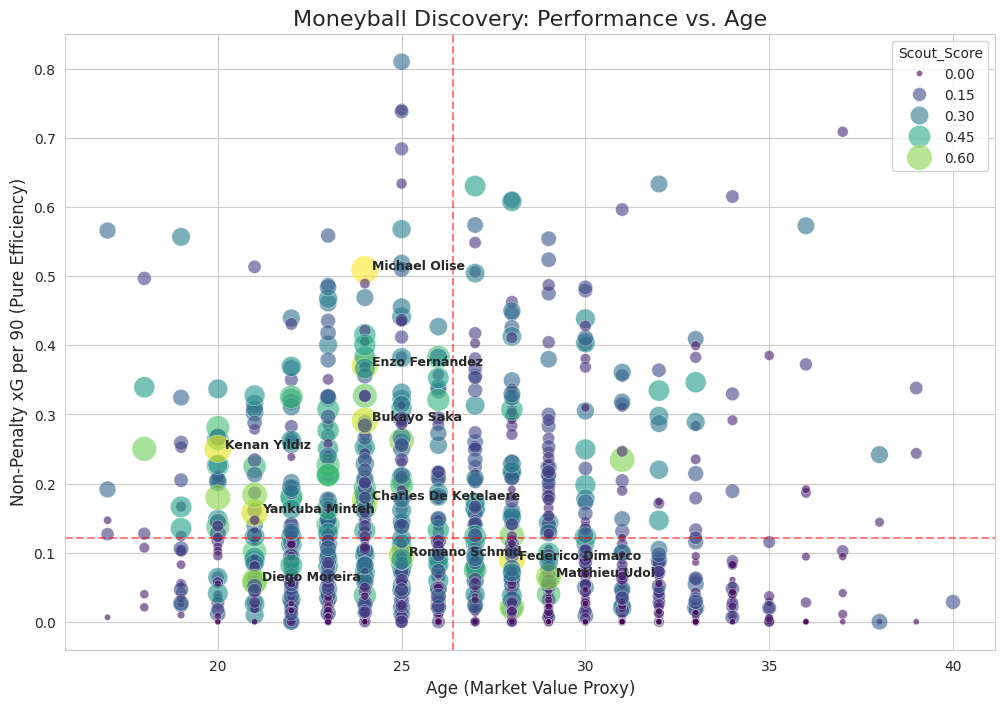

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Setup the figure
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# 2. Create the Scatter Plot
# X-axis: Age (as a proxy for market cost/experience)
# Y-axis: Performance (npxG_90)
plot = sns.scatterplot(
    data=df_clean,
    x='Age',
    y='npxG_90',
    size='Scout_Score',
    hue='Scout_Score',
    palette='viridis',
    sizes=(20, 400),
    alpha=0.6
)

# 3. Annotate the Top 10 Gems so we can see their names
top_gems = df_clean.sort_values(by='Scout_Score', ascending=False).head(10)
for i in range(len(top_gems)):
    plt.text(
        top_gems.Age.iloc[i]+0.2,
        top_gems.npxG_90.iloc[i],
        top_gems.Player.iloc[i],
        fontsize=9,
        weight='semibold'
    )

# 4. Add Quadrant Lines (Mean Age and Mean Performance)
plt.axvline(df_clean.Age.mean(), color='red', linestyle='--', alpha=0.5)
plt.axhline(df_clean.npxG_90.mean(), color='red', linestyle='--', alpha=0.5)

plt.title('Moneyball Discovery: Performance vs. Age', fontsize=16)
plt.xlabel('Age (Market Value Proxy)', fontsize=12)
plt.ylabel('Non-Penalty xG per 90 (Pure Efficiency)', fontsize=12)
plt.show()